In [1]:
library(readxl)
library(dplyr)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
options(warn=-1)
Diamante <- read_excel("C:/Users/Sabrina/Downloads/Exploracion_d_multivariados/diamante_nuevo.xlsx", sheet = 1)
dim(Diamante)
names(Diamante)

[1] 82241    16

[1] "CUE"                "Documento"          "localidad"         
 [4] "Curso"              "turno"              "curso"             
 [7] "periodoEvaluatorio" "asignatura"         "nota"              
[10] "NivelEnsenanza"     "Nivel"              "Modalidad"         
[13] "año"                "EsPrivada"          "orden"             
[16] "Año_cursado"

In [14]:
Diamante_filter<-filter(Diamante, Año_cursado== "PRIMERO" |  Año_cursado== "SEGUNDO" |  Año_cursado== "TERCERO" |
                     Año_cursado== "CUARTO" |  Año_cursado== "QUINTO" |  Año_cursado== "SEXTO")

In [16]:
PrimerT<-filter(Diamante_filter, periodoEvaluatorio=="Primer Trimestre")
PrimerT<-rename(PrimerT,NotasPrimerT=nota)

SegundoT<-filter(Diamante_filter, periodoEvaluatorio=="Segundo Trimestre")
SegundoT<-rename(SegundoT,NotasSegundoT=nota)

prueba<-merge(x = PrimerT, y = SegundoT, by = c("Documento", "asignatura"))

TercerT<-filter(Diamante_filter, periodoEvaluatorio=="Tercer Trimestre")
TercerT<-rename(TercerT,NotasTercerT=nota)

prueba1<-merge(x = prueba, y = TercerT, by = c("Documento", "asignatura"))


In [18]:
Diamante_filter<-dplyr::select(prueba1,'CUE', 'Documento', 'localidad', 'Curso', 'turno', 'curso', 'periodoEvaluatorio', 'asignatura', 'NivelEnsenanza', 'Nivel', 'Modalidad', 'año', 'EsPrivada', 'orden', 'Año_cursado','NotasPrimerT','NotasSegundoT', 'NotasTercerT')

Diamante_filter$Promedio<-round((as.numeric(Diamante_filter$NotasPrimerT)+as.numeric(Diamante_filter$NotasSegundoT)+as.numeric(Diamante_filter$NotasTercerT))/3,2)

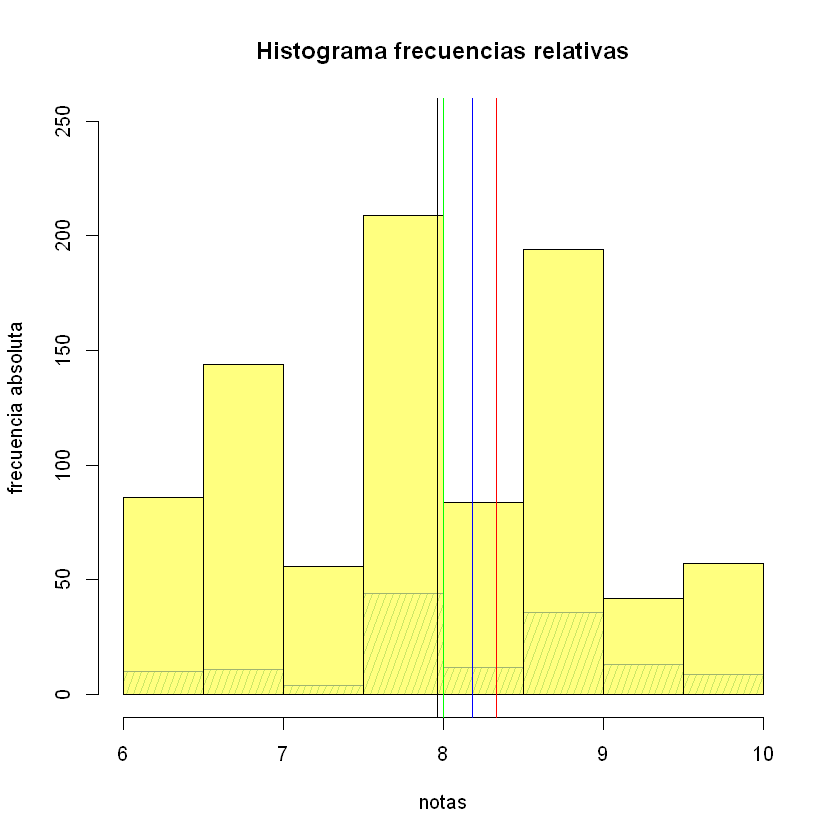

In [37]:
x <- as.numeric(filter(Diamante_filter,Año_cursado== "PRIMERO"  & EsPrivada=="S" & asignatura=="MATEMÁTICA")$Promedio) # Primer grupo
y <-  as.numeric(filter(Diamante_filter ,Año_cursado== "PRIMERO"  & EsPrivada=="N" & asignatura=="MATEMÁTICA")$Promedio)
hist(x, col="paleturquoise3",border="royalblue",breaks = "Sturges", ylim = c(0, 250),
     density=20,angle=70, xlab="notas", ylab="frecuencia absoluta", main="Histograma frecuencias relativas")
hist(y, add = TRUE, col = rgb(1, 1, 0, alpha = 0.5))

mean_x <- mean(x,na.rm=TRUE)     
med_x <- median(x,na.rm=TRUE)   
mean_y <- mean(y,na.rm=TRUE)     
med_y <- median(y,na.rm=TRUE)   

abline(v = mean_x, col = 'blue') #media x
abline(v = med_x, col = 'red') #mediana x

abline(v = mean_y, col = 'black') #media y
abline(v = med_y, col = 'green') #mediana y

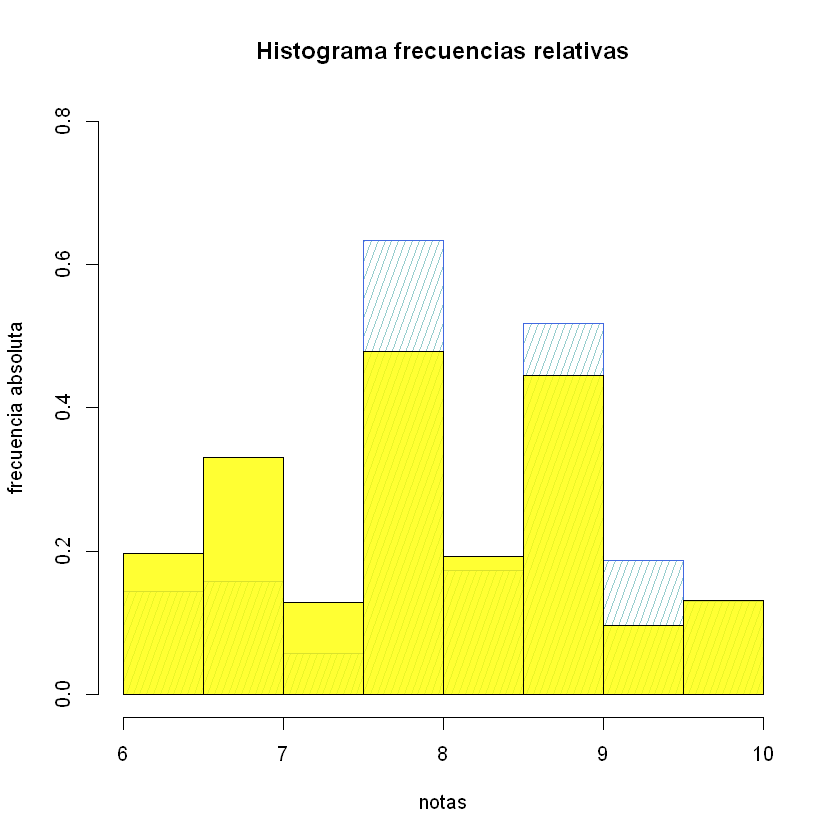

In [54]:
x <- as.numeric(filter(Diamante_filter,Año_cursado== "PRIMERO" & EsPrivada=="S" & asignatura=="MATEMÁTICA")$Promedio) # Primer grupo
y <-  as.numeric(filter(Diamante_filter,Año_cursado== "PRIMERO" & EsPrivada=="N" & asignatura=="MATEMÁTICA")$Promedio)

hist(x,
     probability = TRUE, 
     col="paleturquoise3",
     border="royalblue",
     breaks = "Sturges", 
     ylim = c(0, 0.8),
     density=20,
     angle=70, 
     xlab="notas", 
     ylab="frecuencia absoluta", 
     main="Histograma frecuencias relativas")

hist(y,
     probability = TRUE,
     add = TRUE, 
     col = rgb(1, 1, 0, alpha = 0.8))

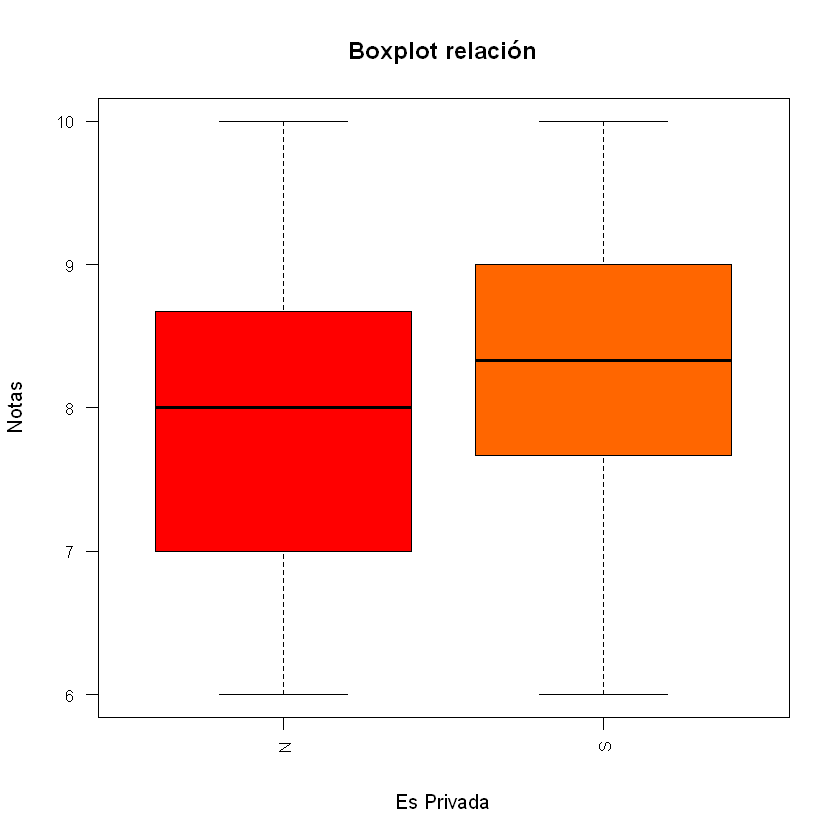

In [65]:
boxplot( filter(Diamante_filter, Año_cursado== "PRIMERO" & asignatura=="MATEMÁTICA")$Promedio ~ filter(Diamante_filter, Año_cursado== "PRIMERO" & asignatura=="MATEMÁTICA")$EsPrivada,
        col = rainbow(15),
        las = 2,
        ylab="Notas",
        xlab="Es Privada",
        cex.axis = 0.8,
        cex.names= 0.75,
        main="Boxplot relación")

# Correlación

In [50]:
#diagrama de dispersión
#deben tener misma dimension
dim(dplyr::select(filter(Diamante_filter,asignatura=="MATEMÁTICA" & Año_cursado== "PRIMERO"),"Documento","Promedio","EsPrivada"))
dim(dplyr::select(filter(Diamante_filter,asignatura=="CIENCIAS NATURALES" & Año_cursado== "PRIMERO"),"Documento","Promedio","EsPrivada"))

df<- dplyr::select(filter(Diamante_filter,asignatura=="MATEMÁTICA" & Año_cursado== "PRIMERO"),"Documento","Promedio","EsPrivada") %>% inner_join(dplyr::select(filter(Diamante_filter,asignatura=="CIENCIAS NATURALES" & Año_cursado== "PRIMERO"),"Documento","Promedio","EsPrivada"),by="Documento")
df<-rename(df,Prom_Mat=Promedio.x, Prom_CsNat=Promedio.y,EsPrivada=EsPrivada.x)

head(df)

[1] 1011    3

[1] 1156    3

Documento,Prom_Mat,EsPrivada,Prom_CsNat,EsPrivada.y
48960601,9.00,N,9.33,N
49019457,8.33,N,7.67,N
49020658,7.33,N,9.33,N
49225652,6.33,N,6.67,N
49296063,8.00,N,7.33,N
49649414,9.00,N,8.33,N


In [47]:
library(ggplot2)

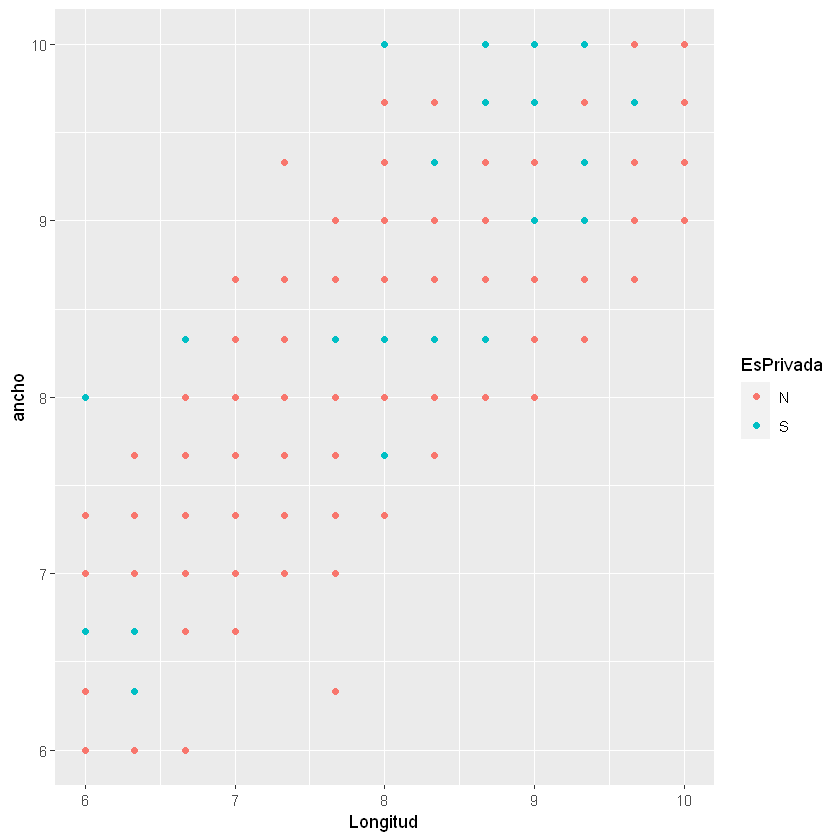

In [57]:
ggplot(data=df, aes(x=Prom_Mat,y=Prom_CsNat)) + geom_point(aes(colour=EsPrivada)) + xlab("Longitud") + ylab("ancho")

`geom_smooth()` using formula 'y ~ x'


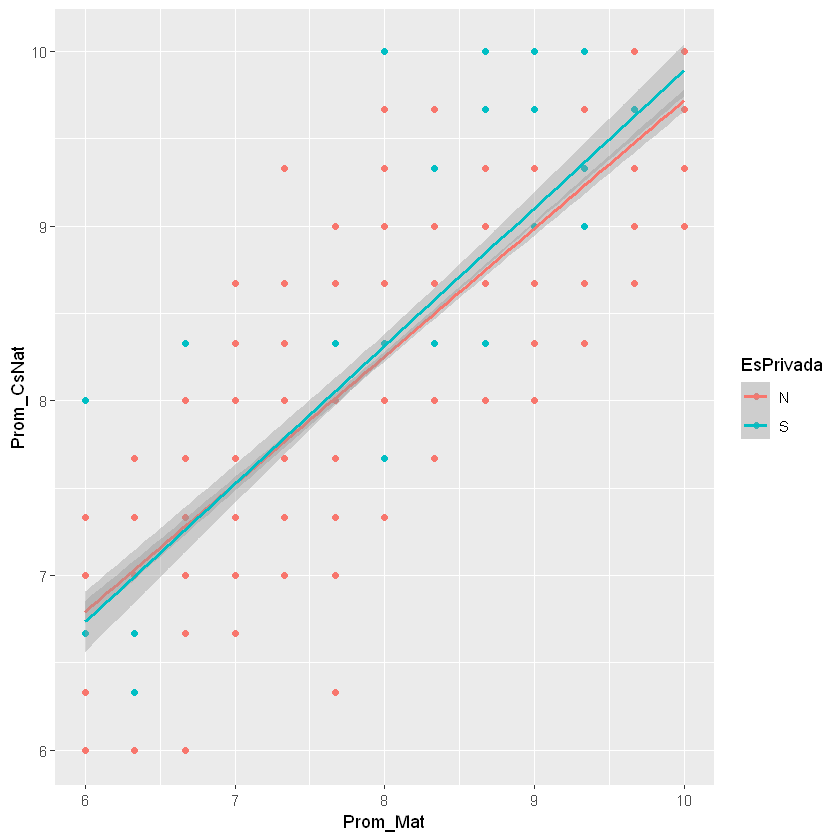

In [58]:
ggplot(data=df,
       aes(x=Prom_Mat,y=Prom_CsNat, color = EsPrivada)) + geom_point() + geom_smooth(method = "lm")

# Varianza y covarianza

In [59]:
dataM <- na.omit(data.frame(df$Prom_Mat, df$Prom_CsNat)) 

dataM <- rename(dataM,Prom_Mat=df.Prom_Mat, Prom_CsNat=df.Prom_CsNat)

var(dataM)

,Prom_Mat,Prom_CsNat
Prom_Mat,0.9795894,0.7259072
Prom_CsNat,0.7259072,0.7251015


In [60]:
library("PerformanceAnalytics")

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



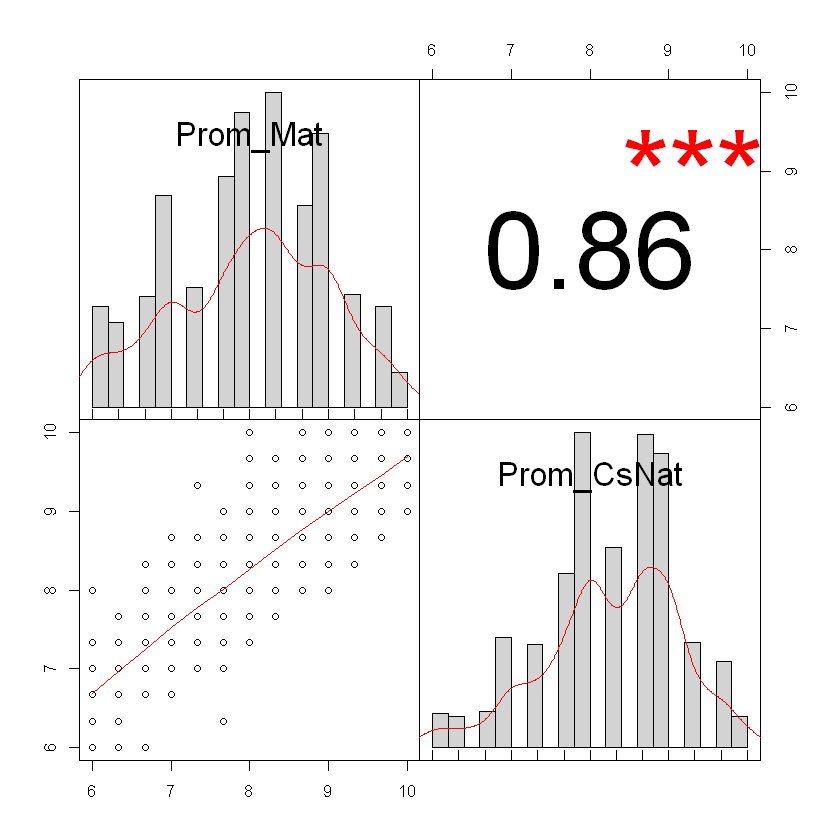

In [61]:
chart.Correlation(dataM, histogram = TRUE, method = "pearson") #dataM: Matriz de correlacion

In [66]:
library(nortest)
lillie.test(x = dataM$Prom_Mat)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataM$Prom_Mat
D = 0.1005, p-value < 2.2e-16


In [67]:
per <- cor(dataM$Prom_Mat, dataM$Prom_CsNat, method = "pearson")
ken <- cor(dataM$Prom_Mat, dataM$Prom_CsNat, method = "kendall")
spe <- cor(dataM$Prom_Mat, dataM$Prom_CsNat, method = "spearman")

data <- data.frame(name=c("pearson","kendall","spearman") , value=c(per,ken,spe))

data

name,value
pearson,0.8613104
kendall,0.7432633
spearman,0.8632962


corrplot 0.88 loaded


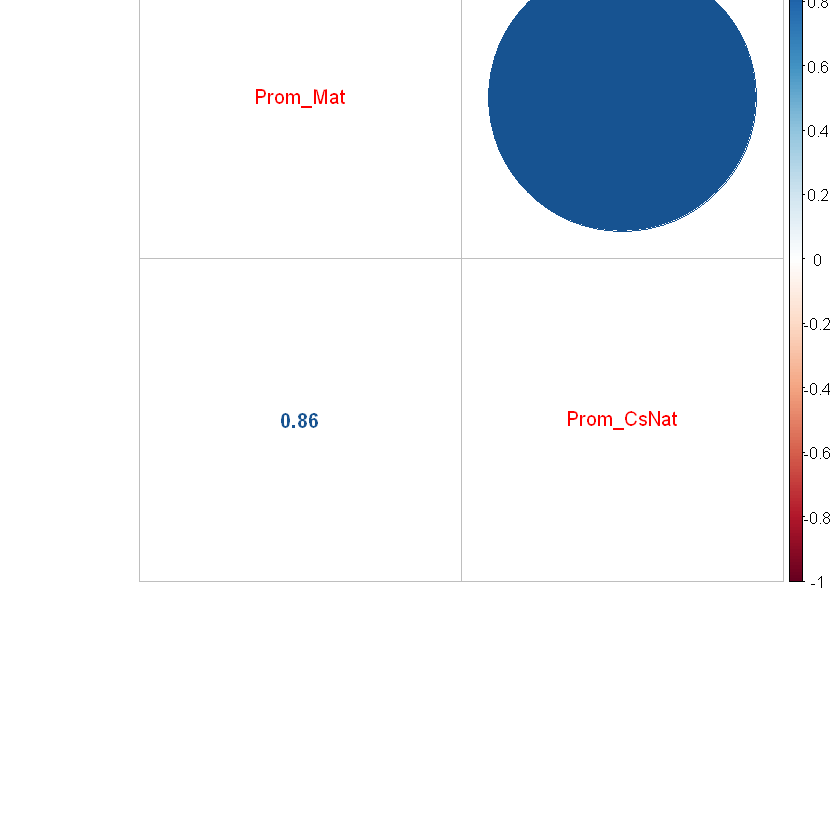

In [68]:
library(corrplot)
corrplot.mixed(cor(dataM, method = "spearman"),addshade="all")

In [72]:
df2<-dplyr::select(filter(Diamante_filter,asignatura=="LENGUA" & Año_cursado== "PRIMERO"),"Documento","Promedio","EsPrivada")

df<- df %>% inner_join(df2,by="Documento")

In [73]:
dataN<-rename(df, Prom_Len= Promedio.x)

In [74]:
head(dataN)

Documento,Prom_Mat,EsPrivada.x,Prom_CsNat,EsPrivada.y,Prom_Len,EsPrivada.y.y,Promedio.y,EsPrivada.x.x,Promedio,EsPrivada.y.y.y
48960601,9.00,N,9.33,N,9.33,N,9.33,N,9.33,N
49019457,8.33,N,7.67,N,7.67,N,7.67,N,7.67,N
49020658,7.33,N,9.33,N,8.00,N,8.00,N,8.00,N
49225652,6.33,N,6.67,N,6.67,N,6.67,N,6.67,N
49296063,8.00,N,7.33,N,6.67,N,6.67,N,6.67,N
49649414,9.00,N,8.33,N,7.67,N,7.67,N,7.67,N


In [76]:
dataN <- na.omit(dataN) 
dataN <-dplyr::select(dataN,Prom_Mat,Prom_CsNat,Prom_Len)
dim(dataN)

[1] 34307     3

In [77]:
library(ppcor)

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [78]:
pcor(dataM, method = c("spearman"))

,Prom_Mat,Prom_CsNat
Prom_Mat,1.0000000,0.8632962
Prom_CsNat,0.8632962,1.0000000
,Prom_Mat,Prom_CsNat
Prom_Mat,0.000000e+00,5.950112e-318
Prom_CsNat,5.950112e-318,0.000000e+00
,Prom_Mat,Prom_CsNat
Prom_Mat,0.0000,55.7693
Prom_CsNat,55.7693,0.0000


In [79]:
library(ppcor)

In [80]:
pcor(dataN, method = c("pearson"))

,Prom_Mat,Prom_CsNat,Prom_Len
Prom_Mat,1.0000000,0.5483093,0.5236204
Prom_CsNat,0.5483093,1.0000000,0.2939059
Prom_Len,0.5236204,0.2939059,1.0000000
,Prom_Mat,Prom_CsNat,Prom_Len
Prom_Mat,0,0,0
Prom_CsNat,0,0,0
Prom_Len,0,0,0
,Prom_Mat,Prom_CsNat,Prom_Len
Prom_Mat,0.0000,121.43631,113.83451
Prom_CsNat,121.4363,0.00000,56.95057


In [82]:
ggm::pcor(c("Prom_Mat","Prom_CsNat","Prom_Len"), cov(dataN))
pcor1<-ggm::pcor(c("Prom_Mat","Prom_CsNat","Prom_Len"), cov(dataN))

[1] 0.5483093

In [84]:
library("pwr") #contrasta que tan potentes son los tests que uso

In [85]:
pwr.r.test(n = length(row.names(dataN)), r = pcor1, sig.level = .05, power = NULL) #power=1: la correlacion es potente


     approximate correlation power calculation (arctangh transformation) 

              n = 34307
              r = 0.5483093
      sig.level = 0.05
          power = 1
    alternative = two.sided
